In [2]:
import numpy as np 
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Préparation des datasets d’entraînement et de test

In [5]:
# get training dataset 
print("Train dataset:")
train_data = tf.keras.utils.image_dataset_from_directory(
    
    directory= "/kaggle/input/emotion-detection-fer/train",
    labels="inferred", # Labels are inferred automatically from subfolder names.
    label_mode = "categorical", # Labels are integer encoded for categorical_crossentropy
    color_mode= 'grayscale',
    batch_size = 32,
    seed=42 
     )

# get test dataset 
print("Test dataset:")
test_data = tf.keras.utils.image_dataset_from_directory(
    
    directory= '/kaggle/input/emotion-detection-fer/test',
    labels="inferred", # Labels are inferred automatically from subfolder names.
    label_mode = "categorical", # Labels are integer encoded for categorical_crossentropy
    color_mode= 'grayscale',
    batch_size = 32,
    seed=4  
)

Train dataset:
Found 28709 files belonging to 7 classes.
Test dataset:
Found 7178 files belonging to 7 classes.


In [11]:

print("Train dataset : ")
for images, labels in train_data.take(1):   # Prendre un batch 
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)

print("Test dataset : ")
for images, labels in test_data.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)

Train dataset : 
Images shape: (32, 256, 256, 1)
Labels shape: (32, 7)
Test dataset : 
Images shape: (32, 256, 256, 1)
Labels shape: (32, 7)


In [14]:
# Affiche les labels 
print("Les étiquettes (labels) de notre dataset: ")
emotion_labels = train_data.class_names
emotion_labels


Les étiquettes (labels) de notre dataset: 


['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

Exemples d’images du dataset d’entraînement 


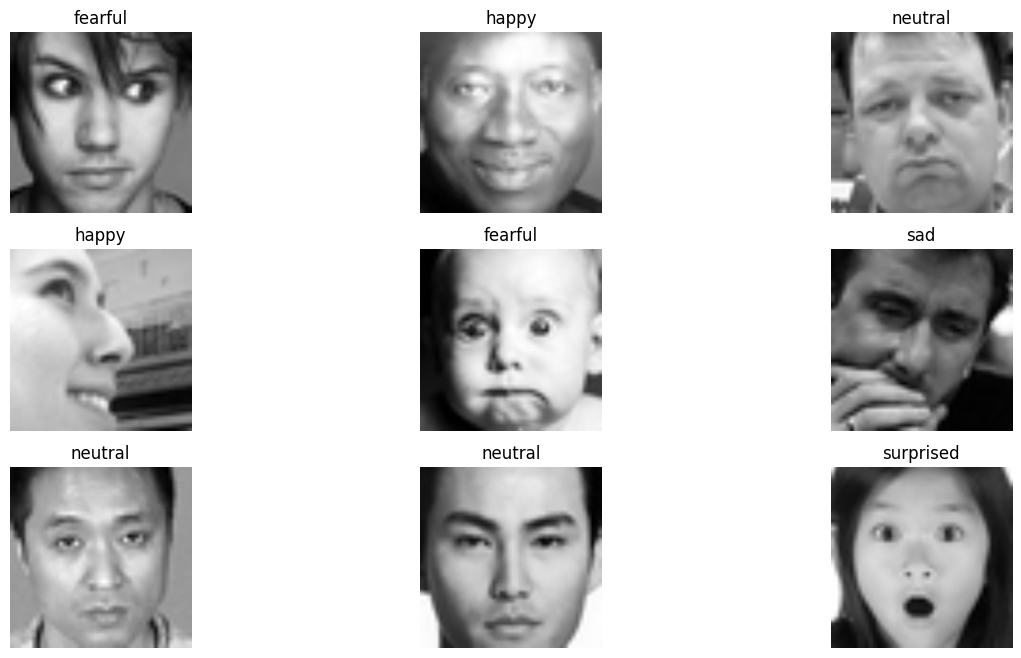

In [14]:
# visualize 9 images and labels from one batch of the train_dataset
print("Exemples d’images du dataset d’entraînement ")
for train_images, labels in train_data.take(1):
  plt.figure(figsize=(15,8))
  for i in range(9):
    plt.subplot(3, 3, i+1) 
    plt.imshow(train_images[i], cmap='gray') # 
    # Convertir one-hot en entier
    label_index = np.argmax(labels[i])
    plt.title(emotion_labels[label_index])
    plt.axis("off")
    
plt.show()

# Entrainement du model CNN

## Model CNN simple 

In [6]:
def Train_CNN(train_data, test_data, epochs):

   # Construction du modèle
    model = tf.keras.Sequential([
       
        layers.Conv2D(40,(3,3),input_shape=(256, 256, 1),activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
       
        layers.Conv2D(80,(3,3),activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),
       
        layers.Conv2D(200,(3,3),activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),

        # Fully Connected Layers
       layers.Flatten(),
       layers.Dense(200,activation='relu'),
       layers.Dropout(0.5),
       layers.Dense(7,activation='softmax')
       
        ])
    
    # Compilation du modèle
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


    # Summary
    print("Résumé du modèle CNN :")
    model.summary()


    # Entraînement du modèle
    history = model.fit(train_data, epochs = epochs, validation_data=test_data )
  

    return model, history

In [9]:
model,history = Train_CNN(train_data, test_data, epochs=10)

Résumé du modèle CNN :


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 40)   │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 40)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128, 128, 40)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 80)   │        28,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 80)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64, 64, 80)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 200)    │       144,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32, 32, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 204800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │    40,960,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,407 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,135,087 (156.92 MB)

 Trainable params: 41,135,087 (156.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 63s 65ms/step - accuracy: 0.2310 - loss: 61.0725 - val_accuracy: 0.2471 - val_loss: 1.8134
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.2569 - loss: 1.8119 - val_accuracy: 0.2471 - val_loss: 1.8132
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.2567 - loss: 1.8111 - val_accuracy: 0.2495 - val_loss: 1.8100
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.2591 - loss: 1.8102 - val_accuracy: 0.2506 - val_loss: 1.8106
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.2567 - loss: 1.8106 - val_accuracy: 0.2497 - val_loss: 1.8106
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.2597 - loss: 1.8084 - val_accuracy: 0.2495 - val_loss: 1.8098
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.2616 - loss: 1.8047 - val_accuracy: 0.2519 - val_loss: 1.8080
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.2636 - loss: 1.8028 -

In [10]:
# sauvgarder le model 
model.save("model_CNN_simple.keras")

In [21]:
def show_some_predictions(model, test_data, emotion_labels, n_images):

    """Affiche n images avec les prédictions du modèle et leurs probabilités. """

   # Softmax pour obtenir les probabilités
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

   # Récupérer le premier batch d'images et labels
    for images, labels in test_data.take(1):
        break  
        
   # Prédictions
    predictions = probability_model.predict(test_data)

    plt.figure(figsize=(15,8))
    for i in range(n_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap = 'gray')

        pred_idx = np.argmax(predictions[i])
        label_name = emotion_labels[pred_idx]
        prob = np.max(predictions[i]) * 100

        plt.title(f"{label_name}\n({prob:.2f}%)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


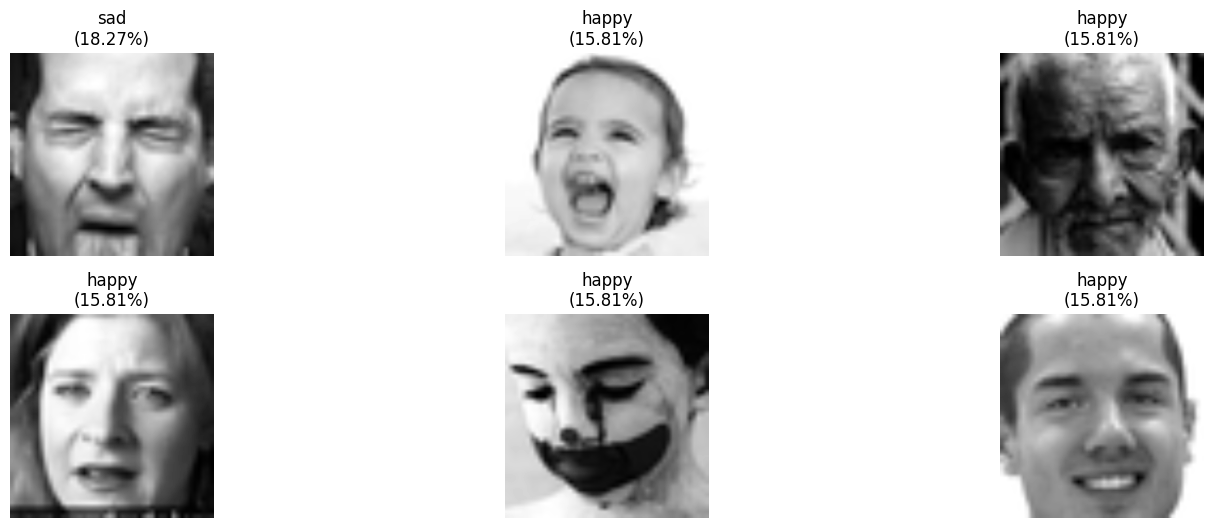

In [26]:
show_some_predictions(model, test_data, emotion_labels, n_images=6)

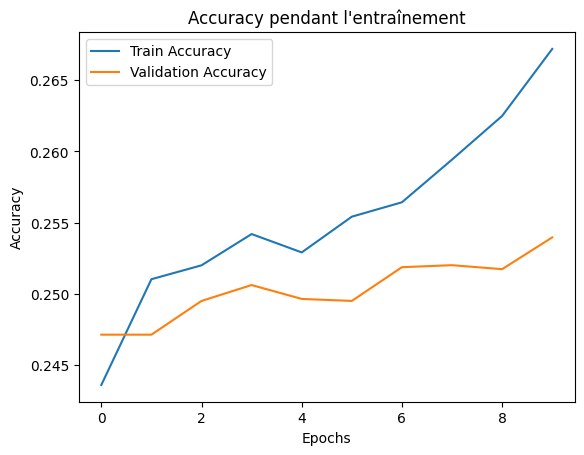

In [27]:

# Tracer les courbes d'accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Nous observons un surapprentissage (overfitting). Dans les prochaines étapes, nous allons appliquer un redimensionnement (rescaling) et une augmentation des données (data augmentation).**

### Data augmentation 

In [7]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomZoom(0.2)
])

In [8]:

def Train_CNN_model(train_data, test_data, epochs):

    # Construction du modèle
    model = models.Sequential([
    # preprocessing 
    layers.Input(shape=(256, 256, 1)),
    data_augmentation,
    layers.Rescaling(1./255),
    
    # Convolutional Block 1
    layers.Conv2D(32,(3,3),activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

     # Convolutional Block 1
    layers.Conv2D(64,(3,3),activation='relu' ,padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

     # Convolutional Block 1
    layers.Conv2D(160,(3,3),activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

        
    layers.Flatten(),
    layers.Dense(160,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7,activation='softmax')
      ])

  # Compilation du modèle
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
     )
    
   # Summary
    print("Résumé du modèle CNN :")
    model.summary()
   # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
   # Entraînement du modèle
    history = model.fit(train_data, epochs = epochs, validation_data=test_data ,  callbacks=[early_stopping])

    return model, history

In [ ]:
model,history = Train_CNN_model(train_data, test_data, epochs=50)

Résumé du modèle CNN :


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 160)    │        92,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 160)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 160)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 163840)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 160)            │    26,214,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,326,823 (100.43 MB)

 Trainable params: 26,326,823 (100.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


E0000 00:00:1763072127.421611      48 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1763072128.849508      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


898/898 ━━━━━━━━━━━━━━━━━━━━ 74s 76ms/step - accuracy: 0.2372 - loss: 2.1646 - val_accuracy: 0.2442 - val_loss: 1.8331
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 65ms/step - accuracy: 0.2533 - loss: 1.8011 - val_accuracy: 0.2223 - val_loss: 1.8371
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.2548 - loss: 1.7928 - val_accuracy: 0.2385 - val_loss: 1.8157
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 0.2584 - loss: 1.7872 - val_accuracy: 0.2487 - val_loss: 1.7972
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 0.2533 - loss: 1.7845 - val_accuracy: 0.2425 - val_loss: 1.8059
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 57s 63ms/step - accuracy: 0.2576 - loss: 1.7810 - val_accuracy: 0.2487 - val_loss: 1.7889
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 56s 63ms/step - accuracy: 0.2567 - loss: 1.7813 - val_accuracy: 0.2460 - val_loss: 1.7895
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - accuracy: 0.2575 - loss: 1.7782 - val_accurac

In [ ]:
import keras
model.save("model_3abit.keras")
